In [2]:
# numerics
import numpy as np
import itertools

# images
from scipy.misc import *
#imresize, imread, imshow
import matplotlib.pylab as plt

# dealing with tar files
import tarfile, gzip

# extracting data about faces/people
import csv

# nice stuff
import os, re
from pprint import pprint

#progressbar
import time
import progressbar

import imageio

In [3]:
from __future__ import absolute_import
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from scipy.misc import imresize 
from keras.layers import *

Using TensorFlow backend.


In [4]:
%matplotlib inline

In [5]:
print("Building test/train lists...")

# skip row 0, which is the header
with open('data/pairsDevTrain.txt', 'r') as csvfile:
    trainrows = list(csv.reader(csvfile, delimiter='\t'))[1:]
with open('data/pairsDevTest.txt', 'r') as csvfile:
    testrows = list(csv.reader(csvfile, delimiter='\t'))[1:]

print("Done.")

Building test/train lists...
Done.


In [6]:
print("Length of training data set: %d"%(len(trainrows)))

Length of training data set: 2200


In [7]:
pprint(trainrows[:10])

[['Aaron_Peirsol', '1', '2'],
 ['Aaron_Peirsol', '3', '4'],
 ['Aaron_Sorkin', '1', '2'],
 ['Abdel_Nasser_Assidi', '1', '2'],
 ['Abdullah', '1', '3'],
 ['Abdullah', '2', '4'],
 ['Abdullah_al-Attiyah', '1', '3'],
 ['Abdullah_al-Attiyah', '2', '3'],
 ['Abel_Pacheco', '1', '4'],
 ['Abel_Pacheco', '3', '4']]


In [8]:
pprint(trainrows[2190:2200])

[['Tammy_Helm', '1', 'Taufik_Kiemas', '1'],
 ['Terje_Roed-Larsen', '2', 'Thomas_Rupprath', '3'],
 ['Thomas_Rupprath', '3', 'Wendy_Kennedy', '1'],
 ['Tim_Howard', '1', 'Tom_Reilly', '1'],
 ['Tom_Craddick', '3', 'Val_Ackerman', '1'],
 ['Tom_Vilsack', '1', 'Wayne_Ferreira', '5'],
 ['Trisha_Meili', '1', 'Vladimiro_Montesinos', '3'],
 ['Ty_Votaw', '1', 'Wayne_Allard', '1'],
 ['Vytas_Danelius', '1', 'Zaini_Abdullah', '1'],
 ['Wendy_Kennedy', '1', 'Zara_Akhmadova', '1']]


In [9]:
print("Length of test data set: %d"%(len(testrows)))

Length of test data set: 1000


In [10]:
def load_image_base(basename, name, number):
    filename = "{0}/{1}/{1}_{2:04d}.jpg".format(basename, name, int(number))
    #print(filename)
    return imageio.imread(filename)

In [11]:
load_image_base("lfw",trainrows[0][0],trainrows[0][1])

Array([[[241, 245, 244],
        [241, 245, 244],
        [240, 244, 243],
        ...,
        [239, 239, 239],
        [239, 239, 239],
        [239, 239, 239]],

       [[240, 244, 243],
        [240, 244, 243],
        [240, 244, 243],
        ...,
        [239, 239, 239],
        [239, 239, 239],
        [239, 239, 239]],

       [[238, 242, 241],
        [238, 242, 241],
        [239, 243, 242],
        ...,
        [239, 239, 239],
        [239, 239, 239],
        [239, 239, 239]],

       ...,

       [[ 30,  44,  53],
        [ 31,  48,  58],
        [ 34,  53,  67],
        ...,
        [ 44,  56,  70],
        [ 43,  55,  69],
        [ 45,  57,  71]],

       [[ 29,  46,  53],
        [ 30,  49,  56],
        [ 30,  52,  65],
        ...,
        [ 43,  55,  69],
        [ 43,  55,  69],
        [ 43,  55,  69]],

       [[ 28,  47,  51],
        [ 29,  49,  56],
        [ 29,  53,  63],
        ...,
        [ 43,  55,  69],
        [ 43,  55,  69],
        [ 43,  55,  69]]

In [12]:
def load_image(tgz_file, basename, name, number):
    
    # images of people are stored in the tar files in the following format:
    # 
    # <basename>/<name>/<name>_<number 04d>.jpg
    #
    # where number comes from the second or third column in the text file
    
    filename = "{0}/{1}/{1}_{2:04d}.jpg".format(basename, name, int(number))
    tgz = tarfile.open(tgz_file)
    return imread(tgz.extractfile(filename))

In [13]:
def extract_features(z):
    features = np.array([z[:,:,0],z[:,:,1],z[:,:,2]])
    return features

In [14]:
tgz = "data/lfw.tgz"
prefix = "lfw"

def load_one_person(row):
    name = row[0]
    
    imgnum1 = row[1]
    img1 = load_image_base(prefix, name, imgnum1)
    
    imgnum2 = row[2]
    img2 = load_image_base(prefix, name, imgnum2)
    
    return img1, img2

img1, img2 = load_one_person(trainrows[0])

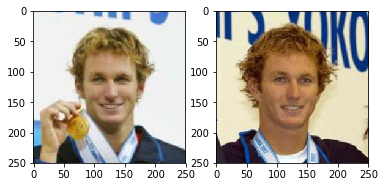

In [15]:
fig = plt.figure()
ax1, ax2 = [fig.add_subplot(1,2,i+1) for i in range(2)]

ax1.imshow(img1)
ax2.imshow(img2)
plt.show()

In [16]:
tgz = "data/lfw.tgz"
prefix = "lfw"

def load_two_persons(row):
    name1 = row[0]
    imgnum1 = row[1]
    img1 = load_image_base(prefix, name1, imgnum1)
    
    name2 = row[2]
    imgnum2 = row[3]
    img2 = load_image_base(prefix, name2, imgnum2)
    
    return img1, img2

img1, img2 = load_two_persons(trainrows[-3])

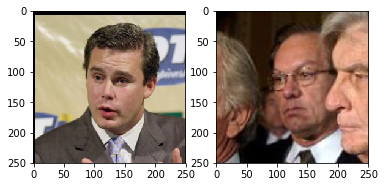

In [17]:
fig = plt.figure()
ax1, ax2 = [fig.add_subplot(1,2,i+1) for i in range(2)]

ax1.imshow(img1)
ax2.imshow(img2)
plt.show()

In [18]:
print(np.shape(img1))

(250, 250, 3)


In [19]:
features = extract_features(img1)
print(np.shape(features))

(3, 250, 250)


In [20]:
np.shape(np.concatenate((extract_features(img1),extract_features(img2))))

(6, 250, 250)

In [21]:
def loaddata(trainrows):
    trainX = []
    trainY = []
    for i in progressbar.progressbar(range(len(trainrows))):
        if len(trainrows[i])==3:
            img1, img2 = load_one_person(trainrows[i])
            trainY.append(1)
        else:
            img1, img2 = load_two_persons(trainrows[i])
            trainY.append(0)
        trainX.append(np.concatenate((extract_features(img1),extract_features(img2))))
    return np.asarray(trainX).astype('float64'), np.asarray(trainY).astype('float64')

In [22]:
trainX, trainY = loaddata(trainrows)

100% (2200 of 2200) |####################| Elapsed Time: 0:00:15 Time:  0:00:15


In [23]:
np.shape(trainX), np.shape(trainY)

((2200, 6, 250, 250), (2200,))

In [24]:
testX, testY = loaddata(testrows)

100% (1000 of 1000) |####################| Elapsed Time: 0:00:06 Time:  0:00:06


In [25]:
np.shape(testX), np.shape(testY)

((1000, 6, 250, 250), (1000,))

In [26]:
trainX[0]

array([[[241., 241., 240., ..., 239., 239., 239.],
        [240., 240., 240., ..., 239., 239., 239.],
        [238., 238., 239., ..., 239., 239., 239.],
        ...,
        [ 30.,  31.,  34., ...,  44.,  43.,  45.],
        [ 29.,  30.,  30., ...,  43.,  43.,  43.],
        [ 28.,  29.,  29., ...,  43.,  43.,  43.]],

       [[245., 245., 244., ..., 239., 239., 239.],
        [244., 244., 244., ..., 239., 239., 239.],
        [242., 242., 243., ..., 239., 239., 239.],
        ...,
        [ 44.,  48.,  53., ...,  56.,  55.,  57.],
        [ 46.,  49.,  52., ...,  55.,  55.,  55.],
        [ 47.,  49.,  53., ...,  55.,  55.,  55.]],

       [[244., 244., 243., ..., 239., 239., 239.],
        [243., 243., 243., ..., 239., 239., 239.],
        [241., 241., 242., ..., 239., 239., 239.],
        ...,
        [ 53.,  58.,  67., ...,  70.,  69.,  71.],
        [ 53.,  56.,  65., ...,  69.,  69.,  69.],
        [ 51.,  56.,  63., ...,  69.,  69.,  69.]],

       [[  2.,   2.,   1., ..., 221.,

In [32]:
def crop_and_downsample(originalX, downsample_size=32):
    """
    Starts with a 250 x 250 image.
    Crops to 128 x 128 around the center.
    Downsamples the image to (downsample_size) x (downsample_size).
    Returns an image with dimensions (channel, width, height).
    """
    current_dim = 250
    target_dim = 128
    margin = int((current_dim - target_dim)/2)
    left_margin = margin
    right_margin = current_dim - margin

    # newim is shape (6, 128, 128)
    newim = originalX[:, left_margin:right_margin, left_margin:right_margin]

    # resized are shape (feature_width, feature_height, 3)
    feature_width = feature_height = downsample_size
    resized1 = imresize(newim[0:3,:,:], (feature_width, feature_height), interp="bicubic", mode="RGB")
    resized2 = imresize(newim[3:6,:,:], (feature_width, feature_height), interp="bicubic", mode="RGB")

    # re-packge into a new X entry
    newX = np.concatenate([resized1,resized2], axis=2)
    
    # the next line is EXTREMELY important.
    # if you don't normalize your data, all predictions will be 0 forever.
    newX = newX/255.0
    
    return newX

In [33]:
ds = 32
X_train = np.asarray([crop_and_downsample(x, downsample_size=ds) for x in trainX])
X_test  = np.asarray([crop_and_downsample(x, downsample_size=ds) for x in testX])

/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [34]:
print(X_train.shape)
print(X_test.shape)

(2200, 32, 32, 6)
(1000, 32, 32, 6)


In [35]:
im = X_train[1]
np.shape(im)

(32, 32, 6)

In [36]:
im

array([[[0.29803922, 0.30196078, 0.18431373, 0.67843137, 0.58039216,
         0.32941176],
        [0.30588235, 0.30196078, 0.18431373, 0.70196078, 0.57647059,
         0.34117647],
        [0.31764706, 0.30588235, 0.18823529, 0.6       , 0.45490196,
         0.30196078],
        ...,
        [0.37647059, 0.36862745, 0.22745098, 0.01568627, 0.01568627,
         0.02745098],
        [0.37254902, 0.36078431, 0.22352941, 0.02352941, 0.02352941,
         0.03529412],
        [0.36470588, 0.35294118, 0.22352941, 0.06666667, 0.07058824,
         0.0745098 ]],

       [[0.3372549 , 0.35294118, 0.22352941, 0.71372549, 0.58431373,
         0.29803922],
        [0.36078431, 0.36078431, 0.21960784, 0.62745098, 0.4745098 ,
         0.21960784],
        [0.4       , 0.37254902, 0.21960784, 0.50588235, 0.3372549 ,
         0.17647059],
        ...,
        [0.41960784, 0.41176471, 0.2745098 , 0.01960784, 0.01568627,
         0.03137255],
        [0.41960784, 0.40784314, 0.27058824, 0.02745098, 0.027

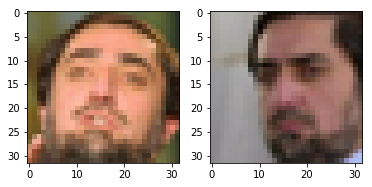

In [37]:
fig = plt.figure()
ax1, ax2 = [fig.add_subplot(1,2,i+1) for i in range(2)]
ax1.imshow(X_train[5,:,:,0:3])
ax2.imshow(X_train[5,:,:,3:6])
plt.show()

In [38]:
nb_classes = 2
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(trainY, nb_classes)
Y_test = np_utils.to_categorical(testY, nb_classes)

In [39]:
np.shape(Y_train),np.shape(Y_test)

((2200, 2), (1000, 2))

In [45]:
# input image dimensions
img_count , img_rows, img_cols, img_channels = np.shape(X_train)

In [46]:
img_count , img_rows, img_cols, img_channels

(2200, 32, 32, 6)

In [47]:
# A common Conv2D model
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
                        input_shape=(img_rows, img_cols, img_channels)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))


print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        880       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
__________

In [52]:
batch_size=256
epochs=50

In [49]:
# initiate RMSprop optimizer
opt = keras.optimizers.Adam(lr=3e-4)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [53]:
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=epochs, verbose=1, validation_data=(X_test, Y_test))

/Users/jayanth/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 2200 samples, validate on 1000 samples
Epoch 1/50
2200/2200 [==============================] - 3s 1ms/step - loss: 0.6908 - acc: 0.5318 - val_loss: 0.6920 - val_acc: 0.5400
Epoch 2/50
2200/2200 [==============================] - 3s 1ms/step - loss: 0.6918 - acc: 0.5214 - val_loss: 0.6918 - val_acc: 0.5030
Epoch 3/50
2200/2200 [==============================] - 3s 1ms/step - loss: 0.6911 - acc: 0.5345 - val_loss: 0.6910 - val_acc: 0.5430
Epoch 4/50
2200/2200 [==============================] - 3s 1ms/step - loss: 0.6918 - acc: 0.5041 - val_loss: 0.6902 - val_acc: 0.5530
Epoch 5/50
2200/2200 [==============================] - 3s 1ms/step - loss: 0.6885 - acc: 0.5482 - val_loss: 0.6893 - val_acc: 0.5480
Epoch 6/50
2200/2200 [==============================] - 3s 1ms/step - loss: 0.6875 - acc: 0.5423 - val_loss: 0.6880 - val_acc: 0.5480
Epoch 7/50
2200/2200 [==============================] - 3s 1ms/step - loss: 0.6857 - acc: 0.5441 - val_loss: 0.6853 - val_acc: 0.5620
Epoch 8/50
220

In [54]:
res1 = model.predict(X_train)
res2 = model.predict(X_test)

In [56]:
res1[0]

array([0.03280561, 0.96719444], dtype=float32)

In [57]:
print("Training Data:")
print("Zeros: %d"%(np.sum(res1[:,1]<0.5)))
print("Ones: %d"%(np.sum(res1[:,1]>0.5)))
print("\n")
print("Testing Data:")
print("Zeros: %d"%(np.sum(res2[:,1]<0.5)))
print("Ones: %d"%(np.sum(res2[:,1]>0.5)))

Training Data:
Zeros: 780
Ones: 1420


Testing Data:
Zeros: 362
Ones: 638


In [59]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk
